In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


In [5]:
df.shape

(3803, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [7]:
df.duplicated().sum()

126

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


# Property Type

<Axes: xlabel='property_type'>

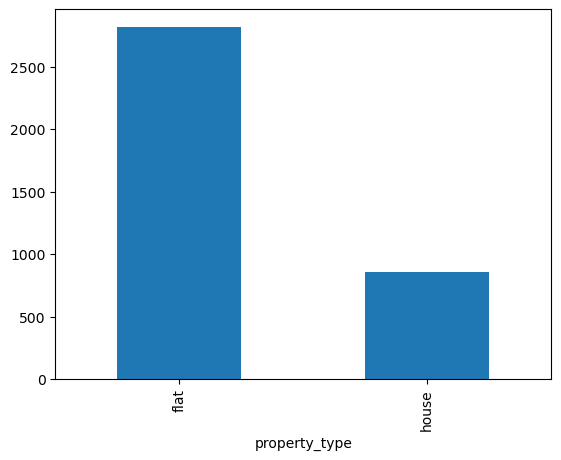

In [12]:
df['property_type'].value_counts().plot(kind='bar')

Observations:
   - No missing values
   - flats are in majority(75%)and there are less number of houses(~25 percent)

# Society

In [13]:
df['society'].value_counts()

society
independent                                          486
tulip violet                                          75
ss the leaf                                           73
dlf new town heights                                  42
shapoorji pallonji joyville gurugram                  42
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
paras dews                                            31
dlf the ultima                                        31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
smart world gems                                      28
la vida by tata housing                               28
godrej nature plus                                    27
signature global solera

In [14]:
df['society'].value_counts().shape

(676,)

In [18]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True)

society
tulip violet                                         0.023511
ss the leaf                                          0.022884
dlf new town heights                                 0.013166
shapoorji pallonji joyville gurugram                 0.013166
signature global park                                0.010972
shree vardhman victoria                              0.010658
smart world orchard                                  0.010031
emaar mgf emerald floors premier                     0.010031
dlf the ultima                                       0.009718
paras dews                                           0.009718
m3m woodshire                                        0.009404
dlf regal gardens                                    0.009404
shree vardhman flora                                 0.009091
smart world gems                                     0.008777
la vida by tata housing                              0.008777
godrej nature plus                                   0.008464


In [19]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True).cumsum()

society
tulip violet                                         0.023511
ss the leaf                                          0.046395
dlf new town heights                                 0.059561
shapoorji pallonji joyville gurugram                 0.072727
signature global park                                0.083699
shree vardhman victoria                              0.094357
smart world orchard                                  0.104389
emaar mgf emerald floors premier                     0.114420
dlf the ultima                                       0.124138
paras dews                                           0.133856
m3m woodshire                                        0.143260
dlf regal gardens                                    0.152665
shree vardhman flora                                 0.161755
smart world gems                                     0.170533
la vida by tata housing                              0.179310
godrej nature plus                                   0.187774


In [20]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
shree vardhman victoria                 0.094357
smart world orchard                     0.104389
emaar mgf emerald floors premier        0.114420
dlf the ultima                          0.124138
paras dews                              0.133856
m3m woodshire                           0.143260
dlf regal gardens                       0.152665
shree vardhman flora                    0.161755
smart world gems                        0.170533
la vida by tata housing                 0.179310
godrej nature plus                      0.187774
signature global solera                 0.196238
bptp terra                              0.204075
vatika gurgaon                          0.211599
tata primanti                           0.219122
experion the

observation:-
   - This "Categorical Column" is packed with 676 types of apartment info. However, 486 out of them are about "Independent Houses," leaving 190 "flats-related categories".
   - To manage this, a temporary dataframe" created specifically for "flats-related categories", and a "cumulative-sum" was applied using "value_counts".
   
   - The analysis revealed that out of 676 categories, the top75 apartments account for approximately 50% of the data.
    - In concrete terms, out of 675 apartments, 3600 flats are distributed amonng them. the top 75 apartments alone contribute 1800 flats, leaving the remaining 1800 flats to be shared among the other 600 apartments.
    
   - consequently, it is evident that there are numerous societies with a high number of flats, while some apartments have a notably smaller count.
    
   - Including this feature as-is could be tricky for our machine learning models.


In [22]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

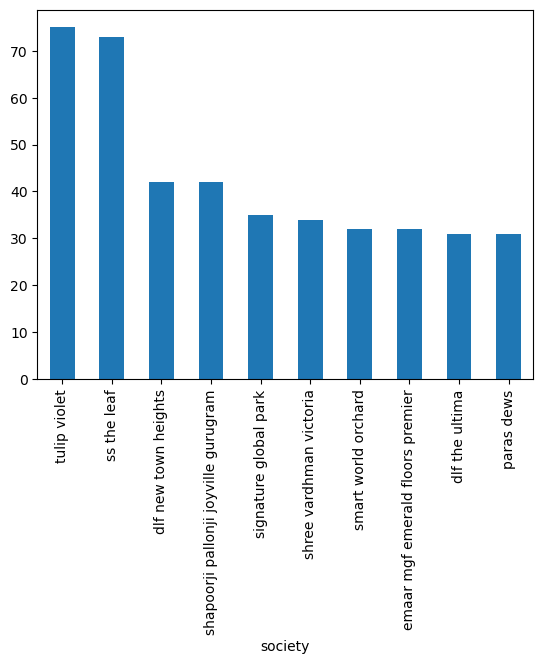

In [24]:
df[df['society']!= 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [25]:
df['society'].isnull().sum()

1

In [26]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3517,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


#### Observations-

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

# sector

In [27]:
df['sector'].value_counts().shape

(113,)

In [28]:
df['sector'].value_counts()

sector
sohna road                    154
sector 85                     108
sector 102                    107
sector 92                     100
sector 69                      93
sector 90                      89
sector 81                      87
sector 65                      87
sector 109                     86
sector 79                      76
sector 33                      69
sector 104                     69
sector 83                      68
sector 43                      65
sector 50                      64
sector 86                      64
sector 37d                     63
sector 95                      62
sector 2                       62
sector 107                     60
sector 108                     59
sector 89                      57
sector 56                      56
sector 48                      55
sector 70a                     54
sector 37c                     51
sector 26                      50
sector 70                      50
sector 84                      49
sector 

<Axes: xlabel='sector'>

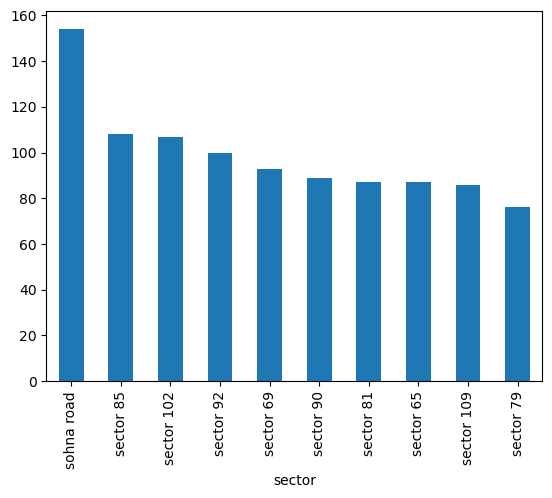

In [30]:
# top 10 sector
df['sector'].value_counts().head(10).plot(kind='bar')

In [31]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

#### Observations

- There are a total of 113 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 21 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are only 1 sectors with only 1 listing.

# Price

In [32]:
df['price'].isnull().sum()

17

In [33]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

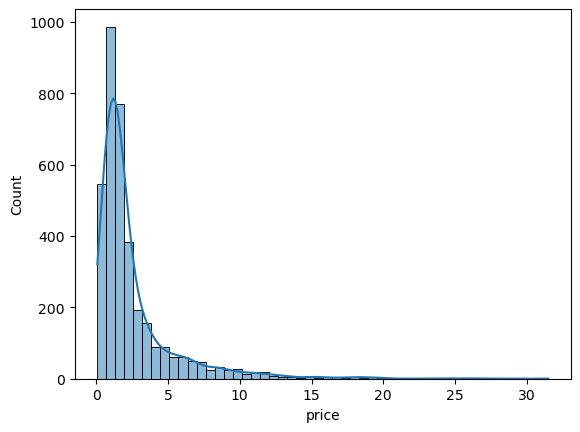

In [34]:
sns.histplot(df['price'], kde=True, bins=50)

<Axes: xlabel='price'>

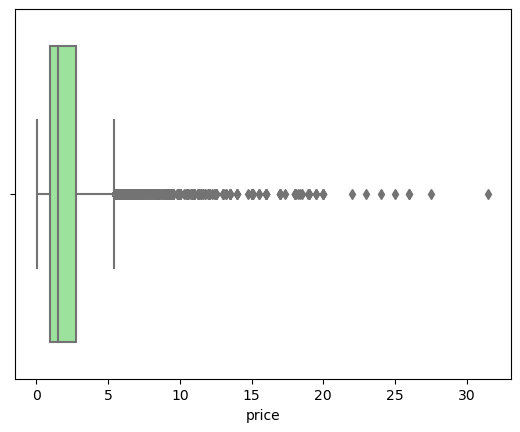

In [35]:
sns.boxplot(x=df['price'],color='lightgreen')

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [36]:
# skewness and Kurtosis

skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2791704733134615 14.933372629214254


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [37]:
# Quantile Analysis

quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

### Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [38]:
# identify potential outliers using IQR method

Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3-Q1

IQR

1.8

In [40]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [41]:
outliers = df[(df['price']< lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [42]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

**Outliers Analysis (using IQR method)** :

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

In [43]:
# price binning

bins = [0,1,2,3,5,10,20,50]
bin_labels = ["0-1", "1-2","2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts()

price
1-2      1315
0-1      1002
2-3       504
3-5       368
5-10      342
10-20     118
20-50      11
Name: count, dtype: int64

In [44]:
# price binning

bins = [0,1,2,3,5,10,20,50]
bin_labels = ["0-1", "1-2","2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index()

price
0-1      1002
1-2      1315
2-3       504
3-5       368
5-10      342
10-20     118
20-50      11
Name: count, dtype: int64

<Axes: xlabel='price'>

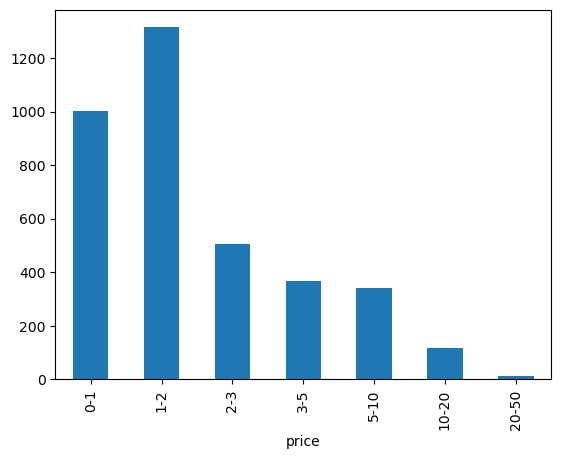

In [45]:
# price binning

bins = [0,1,2,3,5,10,20,50]
bin_labels = ["0-1", "1-2","2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

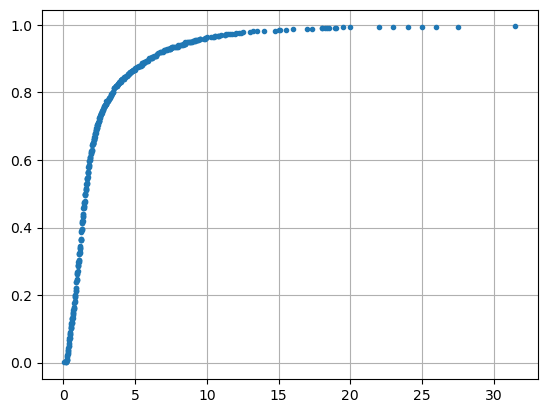

In [46]:
#ecdf (Empirical Cumulative Distribution Function ) plot

ecdf= df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

- **ECDF(Empirical Cumulative Distribution Function)** plot is a varsatile tool for exploring and understanding distributions
of continuous data. it helps to see how data is spread across different percentiles.
- The point where ECDF reaches 0.5 represents the median
- In ECDF plot Outliers can be appear as sharp changes in the slope of the ECDF.
- The ECDF curve rises more steeply(rapid increase) on the left side and then gradually level off or rise more slowly
on the right side, means most of the data points are concentrated on the lower values, and the tail extends towards
higher values.so it showing data is "RIGHT SKEWED"

**Log Transformation**

- When we have right skewed data, to convert them into "Normal Distribution" we apply "Log Transformation"

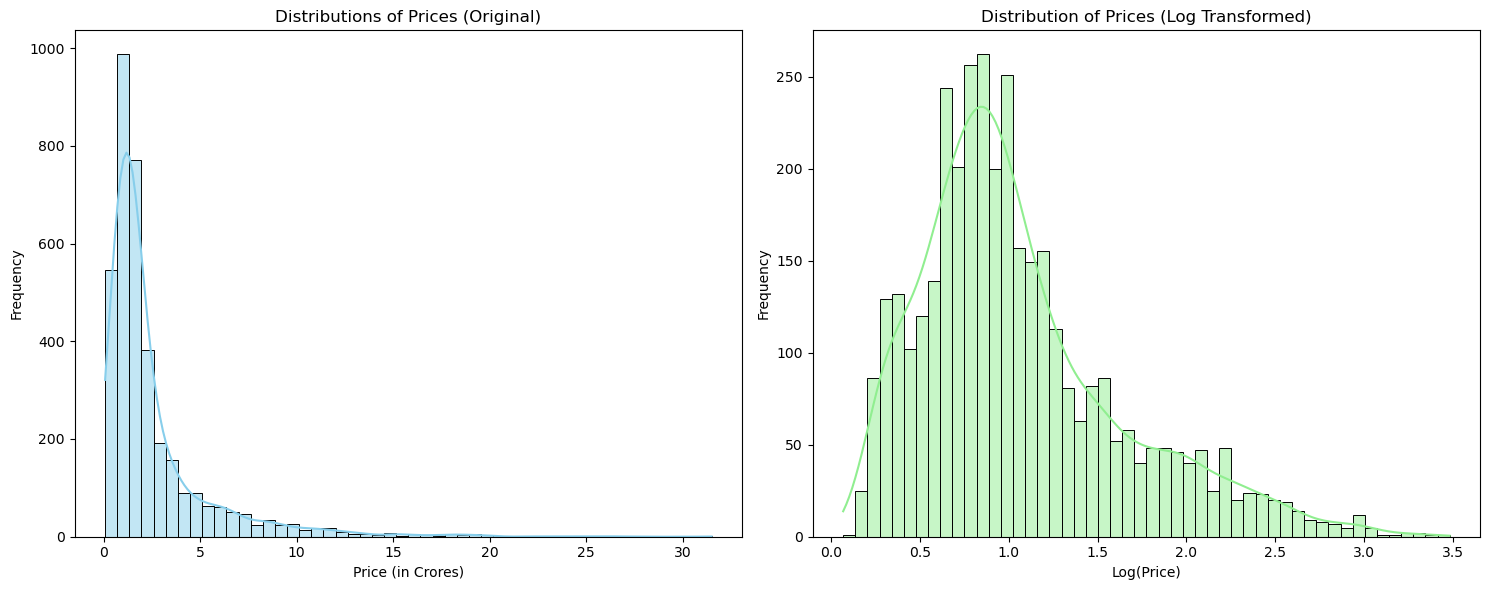

In [50]:
plt.figure(figsize=(15,6))

# distribuiton plot without log transformation

plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distributions of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')


# distribution plot with log transformation

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

-  so after log distribution data become kind of "Normally distributed" and distribution which was earlier till 30 cr now under 3.5crore.which is good sign.

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

It is particularly useful when dealing with values close to zero. By adding 1 to x before taking the logarithm, it avoids the issues associated with taking the logarithm of small values and provides more accurate results.

In [52]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.0740709565255313 0.9646692415449265


**Box-Plot**

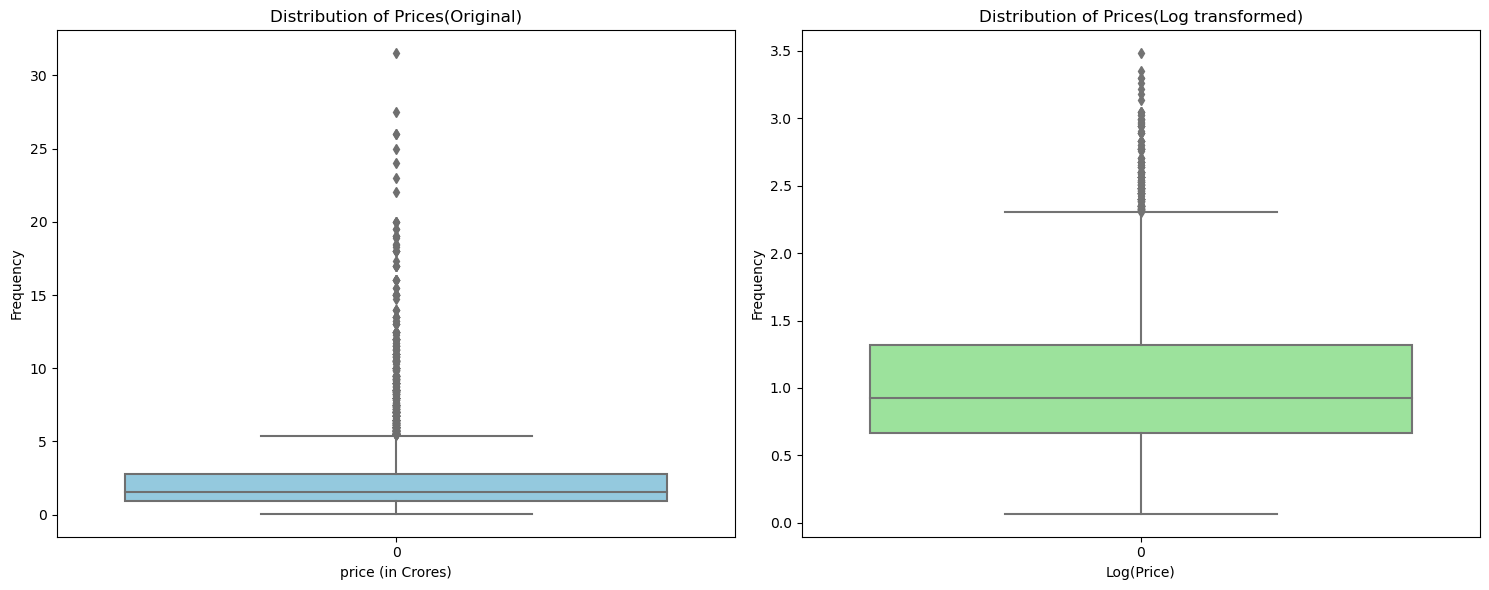

In [58]:
plt.figure(figsize=(15,6))

# distribution plot without log transformation

plt.subplot(1,2,1)
sns.boxplot(df['price'], color = 'skyblue')
plt.title('Distribution of Prices(Original)')
plt.xlabel('price (in Crores)')
plt.ylabel('Frequency')


# distribution plot after log transformation

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color = 'lightgreen')
plt.title('Distribution of Prices(Log transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


- so after log transformation range improved and outlier also reduced.

# Price Per Sqft

In [72]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


In [73]:
df['price_per_sqft'].isnull().sum()

17

In [75]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

**Describe Observation:-**
   - The price per square foot stands at 13000rupees, a considerably high figure for a metropolitan city like Gurgaon. However, in tire-2 cities, this value drops to a more standard 5000 rupees per square foot.
    
   - The minimum value, at 4 rupees, appears anomalous considering the mean is 13000 rupees. This discrepancy indicates the presence of outliers.
    
   - The Median, hovering around 9000 rupees, serves as a more reliable representation, considering the slight inflation caused by the outlier with a price of 13000 rupees.
   
   - The 75th percentile of flat price aligns with the mean at approximately 13000 rupees.
    
   - The maximum values of 6lakh rupees per square foot appears exceptionally high, clearly influenced by outliers and introducing a level of distrotion to the overall distribution

**Histogram**

<Axes: xlabel='price_per_sqft', ylabel='Count'>

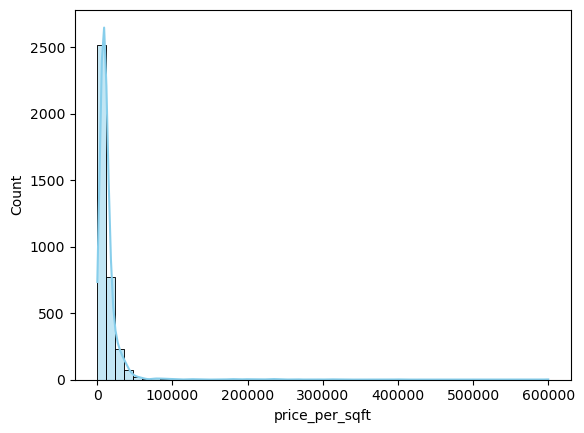

In [76]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

**Boxplot**

<Axes: >

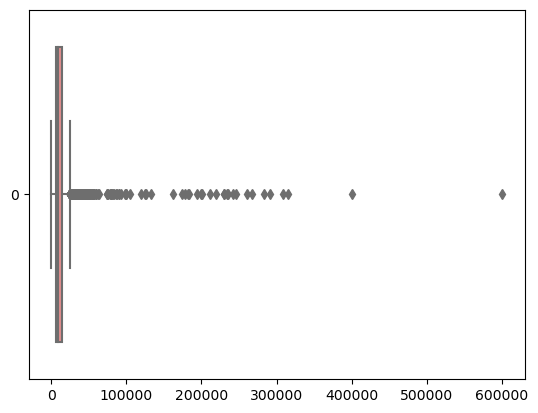

In [82]:
sns.boxplot(df['price_per_sqft'], color='lightcoral', orient='h')

- The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers.


- Its evidant that certain data points falloutside the expected range for Gurgaon property prices, considering domain knowledge. These outliers, represented by extreme values, may indicate anomalies or errors in the dataset,as the observed figures seem implausible within the context of the real estate market in gurgaon.


#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values


In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


# Bedroom

In [85]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

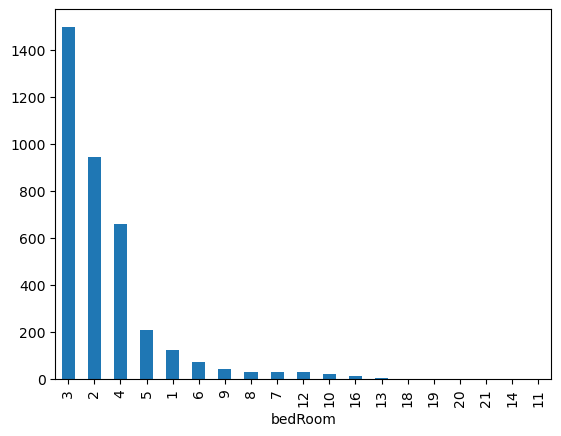

In [86]:
df['bedRoom'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

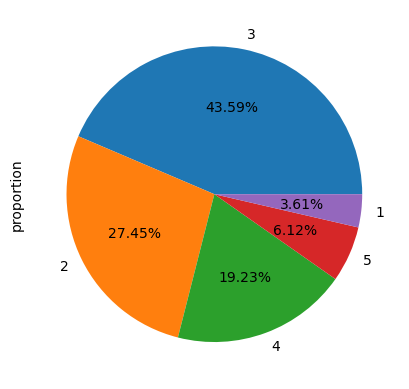

In [87]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct= '%0.2f%%')

- There are no missing values in data.
- The variable, representing the number of bedrooms, can be treated as categorical due to its discrete nature(1 to21)bedrooms.

**Barplot**
- Maximum occurences are observed in 2,3,and 4 bhk flats. There are also flats with 1 and 5 bedrooms,
while a significant number have 21 bedroom.


**Piechart**
- Approximately 43.59% of flats are 3bhk.
- Around 27.45% are 2bhk.
- 19.23% of flats are 4bhk.
- 6.12% are 5bhk.
- 3.61% are 1bhk.

# Bathroom

In [88]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

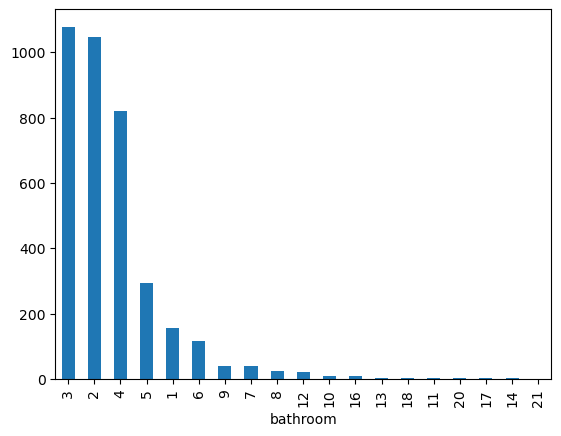

In [89]:
df['bathroom'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

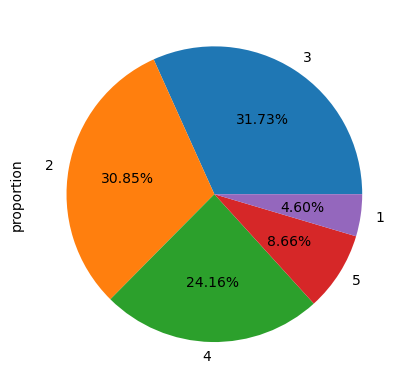

In [92]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%' )

- No missing values are present in bathroom dataset.

**Barplot**
- The count of 2,3,and 4 bathrooms is higher, with some outliers reaching up to 20 bathrooms.

**Piechart**
- The bathroom distribution is as follows:
    - 3 bathrooms: 31.73%
    - 2 bathrooms: 30.85%
    - 4 bathrooms: 24.16%
    - 5 bathrooms:  8.66%
    - 1 bathrooms:  4.60%

# Balcony

In [93]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

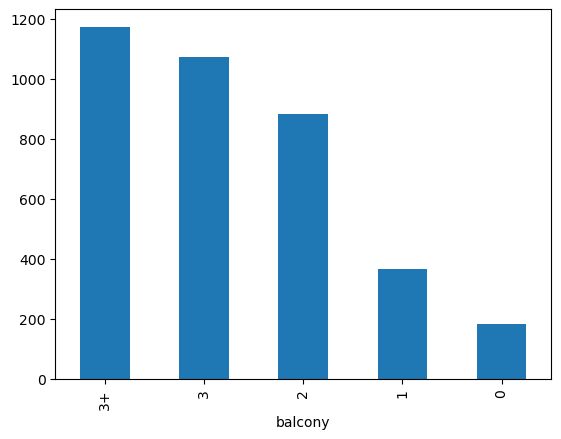

In [94]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

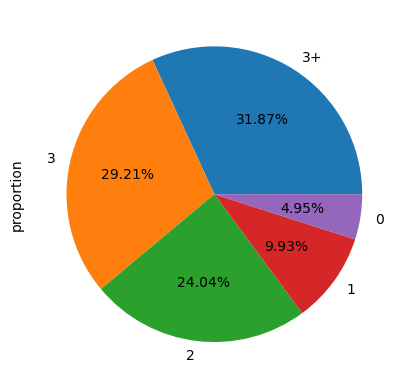

In [95]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

- No missing values are found in balcony dataset.

**Barplot**
-The column is categorical, featuring options like 3+balcony.

**Piechart**
- The balcony distribution is illustrated as follows:
    - Flats with "3+balcony" constitute 31.87%
    - Those with exactly "3balconies" make up 29.21%.
    - Flats featuring "2 balconies" account for 24%.
    - "1 balcony" in flats represents 10%
    - Flats with "zero balconies" constitute 5%.

# Floor Number

In [97]:
df['floorNum'].isnull().sum()

19

In [98]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

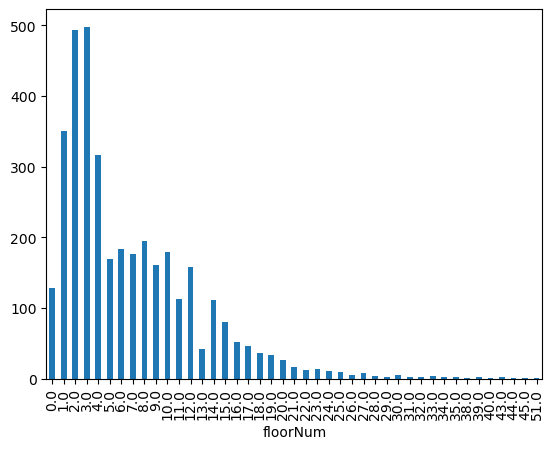

In [99]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

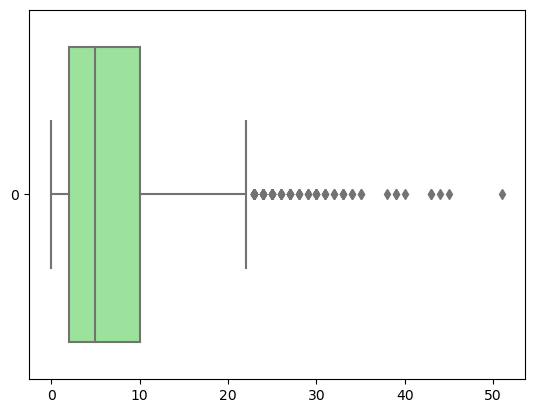

In [101]:
sns.boxplot(df['floorNum'], color='lightgreen', orient='h')

 The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# Facing

In [102]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


In [105]:
df['facing'].isnull().sum()

1045

In [106]:
df['facing'].fillna('NA', inplace=True)

In [107]:
df['facing'].value_counts()

facing
NA            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

- out of 3600 flats, data for 1045 flats is missing.To facilitate analysis, these missing values are filled with 
"NA" to apply value counts.
- North-east and east-facing flats both total 623 each.
- North-facing flats count 387, west facing flats count 249.
- South facing flats count 231,North west facing flats 193, and south east facing flats count 173.
- South west facing flats total 153.

This information prompts an exploration into whether east and north facing properties command higher prices. This 
investigation aims to assess the relevance and significance of this column in determining property prices.

# Age Possession

In [108]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99


In [109]:
df['agePossession'].isnull().sum()

0

In [110]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

- No missing values are detected in age possession dataset.
- 1600 properties fall into category of relatively new, 2 to 3 year old.
- There are 593 brand new categories.
- Moderately old properties number 563.
- 306 properties are labeled as undefined, signifying an unknown age that requires attention.

# Areas - Super built up area

In [111]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99


In [112]:
df['super_built_up_area'].isnull().sum()

1802

In [113]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

- The dataset includes 1875 entries for super built up area. 1802 missing values.
- The minimum recorded area is 89 square units, raising concerns about its validity and potentially indicating an outlier.
- The average super built up area is around 1925.24 square units.
- The standard deviation is 764.17, indicating the extent of variability in the dataset.
- The maximum recorded area is 10000 square units.
- The median (50th percentile)super built up area is 1828 square units.
- The interquartiel range(IQR)spans from the 25th percentile (1479.5 square units)to the 75th percentile (2215 square units).
These observations provide a comprehensive summary of the distribution and notabble points regarding super built up area in the dataset.

<Axes: xlabel='super_built_up_area', ylabel='Count'>

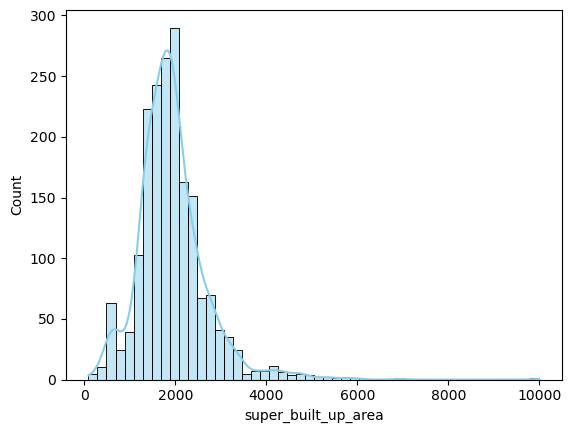

In [114]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: >

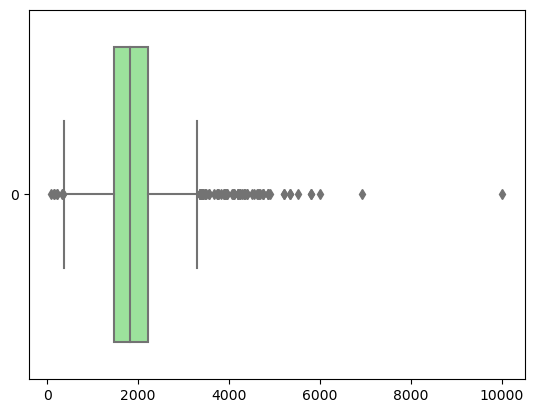

In [116]:
sns.boxplot(df['super_built_up_area'].dropna(), color= 'lightgreen', orient='h')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

# Built up area

In [117]:
df['built_up_area'].isnull().sum()

1987

In [118]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

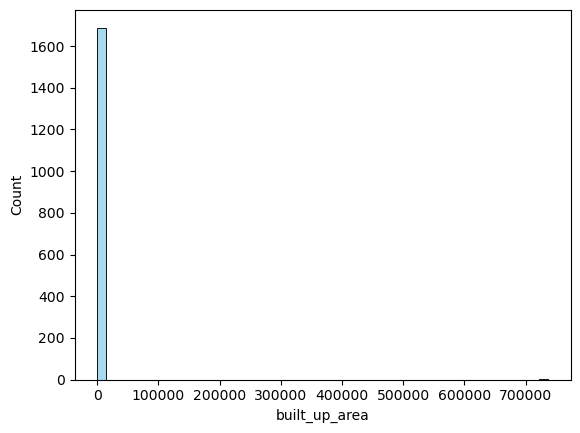

In [119]:
sns.histplot(df['built_up_area'], bins=50, color='skyblue', kde= False)

<Axes: >

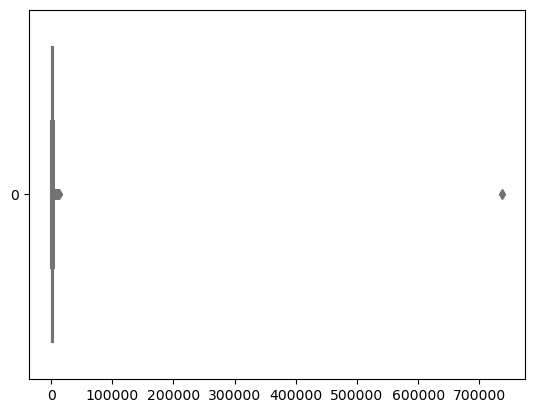

In [121]:
sns.boxplot(df['built_up_area'].dropna(), color= 'lightgreen', orient='h')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

# Carpet Area

In [122]:
df['carpet_area'].isnull().sum()

1805

In [123]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

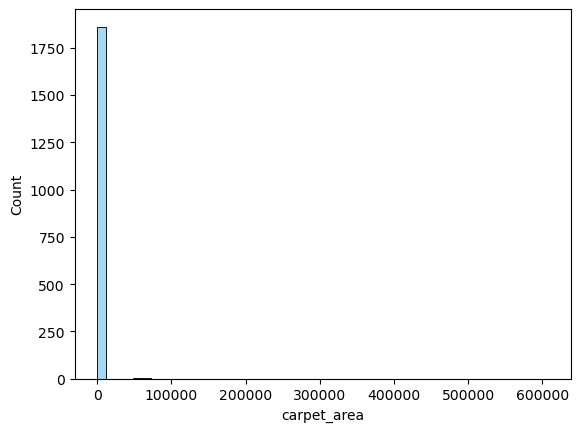

In [126]:
sns.histplot(df['carpet_area'], bins= 50, color='skyblue', kde=False)

<Axes: >

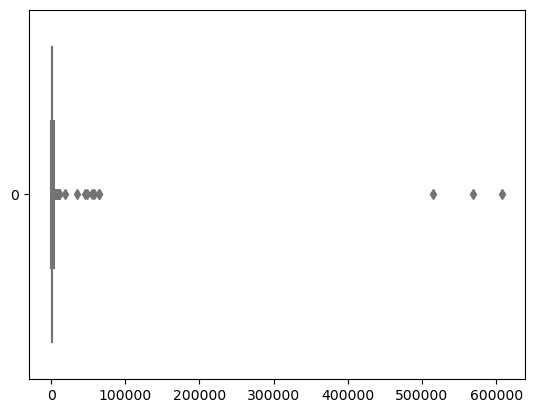

In [130]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen', orient='h')

In [131]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52


# Additional Rooms
## study room, pooja room, servant room, store room, others

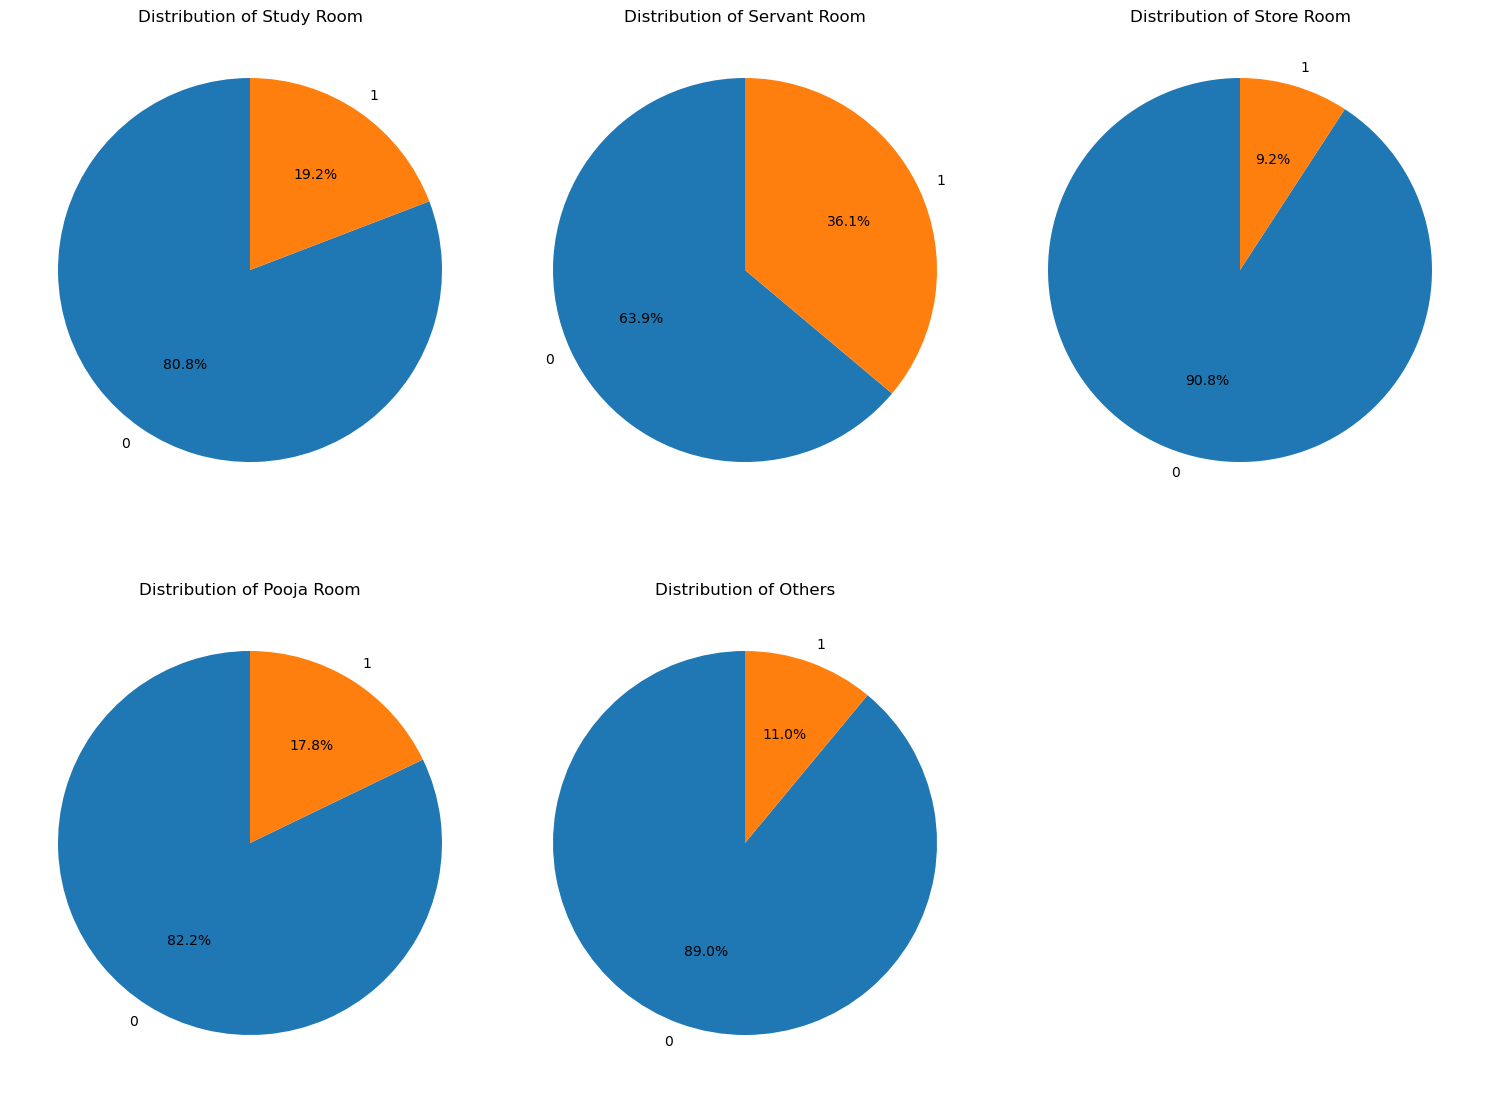

In [134]:
plt.figure(figsize=(15,12))

# create a subplot of pie chart foe each room type

for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax= plt.subplot(2,3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')
    
 
plt.tight_layout()
plt.show()

# Furnishing Type

In [135]:
df['furnishing_type'].value_counts()

furnishing_type
0    2416
2    1054
1     207
Name: count, dtype: int64

<Axes: ylabel='count'>

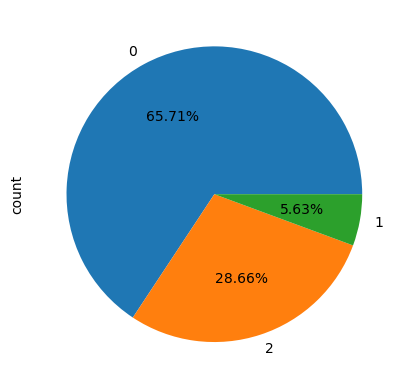

In [136]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

# Luxury Score

In [137]:
df['luxury_score'].isnull().sum()

0

In [138]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

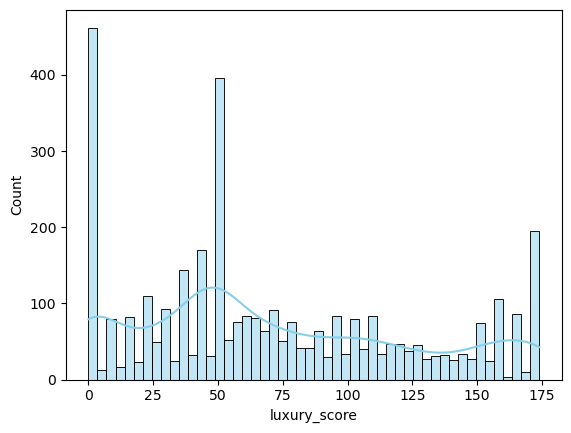

In [139]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: >

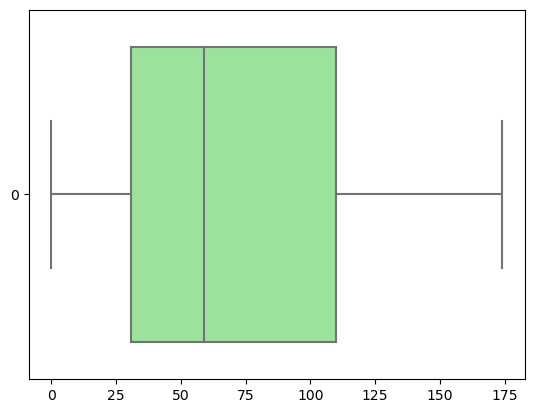

In [141]:
sns.boxplot(df['luxury_score'], color='lightgreen', orient='h')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [142]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,3.05,15561.0,1960.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2150 sq.ft. (199.74 sq.m.)Carpet area: 1960 sq.ft. (182.09 sq.m.),3,4,3,3.0,North-West,Relatively New,2690.0,2150.0,1960.0,0,1,0,0,0,0,174
1,flat,m3m woodshire,sector 107,0.88,6442.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,3.0,East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,0,99
2,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,3900.0,3743.0,0,1,0,0,0,1,105
3,house,independent,sector 12,1.40,8702.0,1609.0,Plot area 166(138.8 sq.m.),2,2,1,2.0,North-East,Old Property,NaN,166.0,NaN,0,0,0,0,0,0,0
4,flat,maxworth city residences,sector 10a,0.90,7083.0,1271.0,Super Built up area 1200(111.48 sq.m.),2,2,3,9.0,East,New Property,1200.0,NaN,NaN,0,0,0,0,1,0,52
